## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

In [3]:
from sklearn.linear_model import LinearRegression

# 轉換 x 為 2D array
X = x.reshape(-1, 1)

# 初始化線性回歸模型
regr = LinearRegression()

# 訓練模型
regr.fit(X, y)

# 獲取斜率和截距
w = regr.coef_[0]
b = regr.intercept_

print(f"斜率 (w): {w}")
print(f"截距 (b): {b}")

斜率 (w): 1.617018521261157
截距 (b): 0.2731296894942137


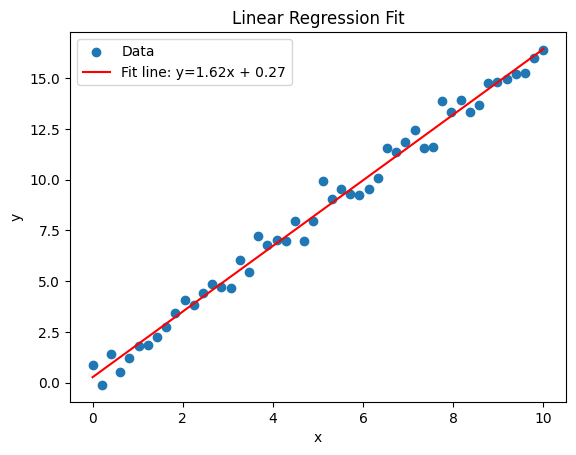

In [4]:
# 繪製原始數據與預測結果
plt.scatter(x, y, label='Data')
plt.plot(x, regr.predict(X), color='red', label=f'Fit line: y={w:.2f}x + {b:.2f}')

# 添加標題和標籤
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 顯示圖形
plt.show()

## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 將 x 轉換為 2D array
X = x.reshape(-1, 1)

# 切割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

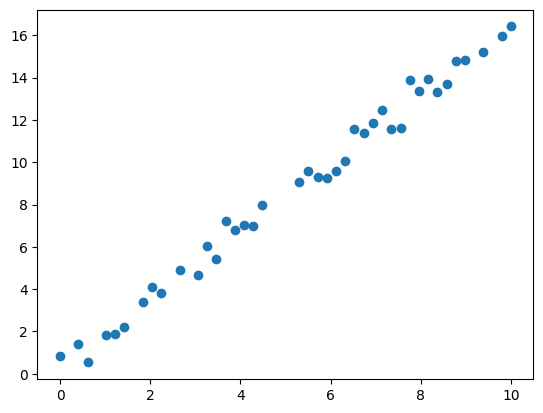

In [7]:
# 繪製訓練資料集
plt.scatter(X_train, y_train)
plt.show()

## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

Training MSE: 0.22844953007613164


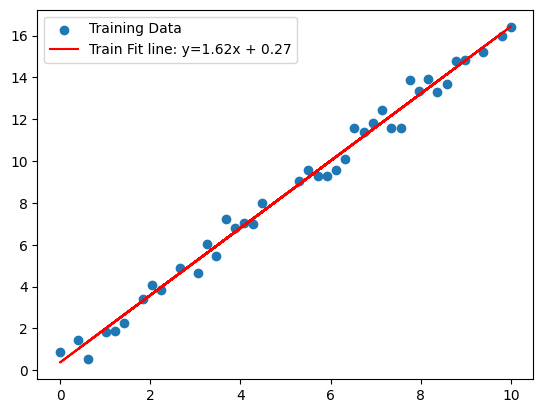

In [8]:
# 初始化線性回歸模型
regr = LinearRegression()

# 使用訓練集訓練模型
regr.fit(X_train, y_train)

# 使用訓練集進行預測
y_pred_train = regr.predict(X_train)

# 計算訓練均方誤差 (MSE)
mse_train = np.mean((y_pred_train - y_train)**2)
print(f"Training MSE: {mse_train}")

# 繪製訓練集數據和預測結果
plt.scatter(X_train, y_train, label='Training Data') # 原始數據
plt.plot(X_train, y_pred_train, color='red', label=f'Train Fit line: y={w:.2f}x + {b:.2f}') # 預測數據
plt.legend()
plt.show()

## 將訓練出來的函數預測測試集的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [9]:
# 使用訓練模型進行 X 值的預測
x_value = 2.44897959
X_value = np.array([[x_value]])
y_pred = regr.predict(X_value)
print(f"Prediction for X = {X_value}: {y_pred[0]}")

# 使用訓練模型預測測試集所有資料
y_pred_test = regr.predict(X_test)
print("===================")
print("Predictions for all test data:", y_pred_test)

Prediction for X = [[2.44897959]]: 4.3025375049547385
Predictions for all test data: [ 4.3025375   4.95828946  1.67952971  2.99103361 15.12244466  0.69590179
  8.56492518  8.23704919 15.7781966   7.90917322]


2. 並計算出測試階段的MSE

Testing MSE: 0.41344072565862966


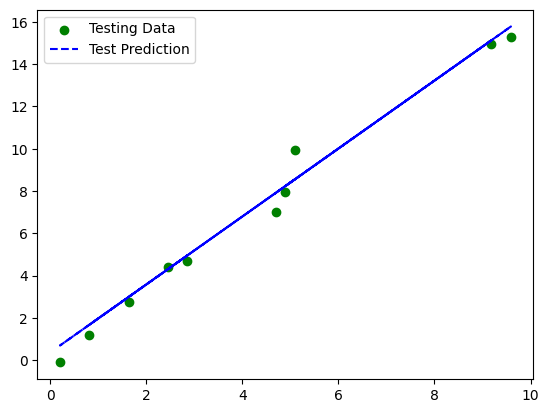

In [10]:
# 初始化線性回歸模型
regr = LinearRegression()

# 使用訓練集訓練模型
regr.fit(X_train, y_train)

# 使用測試集進行預測
y_pred_test = regr.predict(X_test)

# 計算測試均方誤差 (MSE)
mse_test = np.mean((y_pred_test - y_test)**2)
print(f"Testing MSE: {mse_test}")

# 繪製測試集數據和預測結果
plt.scatter(X_test, y_test, label='Testing Data', color='green')
plt.plot(X_test, y_pred_test, color='blue', linestyle='dashed', label='Test Prediction')
plt.legend()
plt.show()

3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)

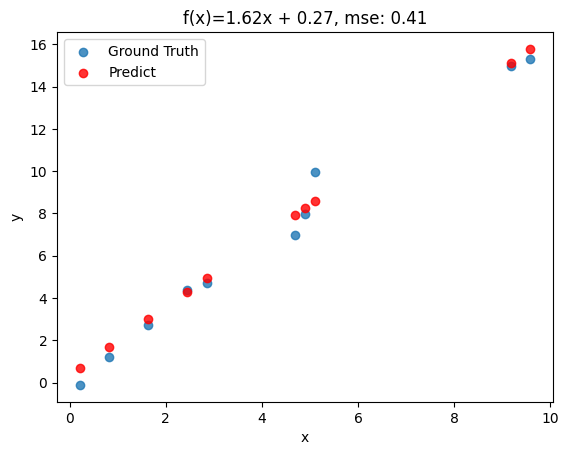

In [11]:
# 繪製測試數據和預測數據的差異
title = f'f(x)={w:.2f}x + {b:.2f}, mse: {mse_test:.2f}'
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
# plt.grid(True)

plt.scatter(X_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(X_test, y_pred_test, c='r', alpha=0.8,label='Predict')
plt.legend()
plt.show()